# Identify Persons of Interest using Machine Learning

### Eddy Shyu

### Summary of project goal

Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?  [relevant rubric items: “data exploration”, “outlier investigation”]

Given information about Enron employees and whether they are persons of interest (POI) in fraud, we use machine learning to predict whether employees are persons of interest or not.  The data is primarily numerical, and either compensation related data (salary, bonus, stock options) or email count data (messages sent to persons of interest, all messages sent, etc). There are 144 persons in the dataset (after removing two non-person records), of which 18 are person of interest and the rest are not.  Some features have 100 or more missing values (deferral_payments, restricted_stock_deferred, director_fees, loan_advances), so we'll focus on features that have fewer missing values.  Compensation and email data can represent latent features, such as how similar a person is to a POI, or how professionally connected one is to a POI.  We will be using 11 features, 8 related to compensation, and 3 features related to email counts.

Each record should represent a person.  Using a histogram of salary, I found an outlier named "TOTAL", which I removed, since it is not a person.  I also removed "The Travel Agency in the Park" because it also does not represent a person.  Outliers that represent persons are kept (for example, Jeff Skilling's salary was an outlier that was kept).



---

### Feature Selection

What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.  [relevant rubric items: “create new features”, “properly scale features”, “intelligently select feature”]

I chose features that represent compensation and email counts, and excluded features that had more than a threshold of missing values.  When a feature has too many missing values, it can unintentionally associate missing values to a particular class.  When choosing the threshold, I wanted to include features that had fewer missing values than the core features that I wanted to keep (email counts), which was 60 missing values out of 144 total records.  The "bonus" feature was close enough to the threshold that I kept it as well.

I normalized emails sent to persons of interest by dividing by total number of emails sent; similarly for emails received from POI and emails received that were also sent to a person of interest.  This represents the fraction of each person's emails that were associated with a POI.  The latent feature I think that this represents is how close the professional relationship was with POIs.  I scaled all of the compensation and email count ratios to range from 0 to 1, to accommodate algorithms that calculate distances using features, such as SVM.  I used a random forest regression and also selectKBest algorithm to rank features by importance.  Although the orders varied between the two methods, compensation was ranked as more important that the email count ratios.  I take a subset of features, as I will use Principle Component Analysis (PCA) to reduce the dimensions of the features.

I compared the final model with and without derived email features.  I found that removing email features and relying only on the compensation data gives us a higher precision but lower recall, and slightly lower F1 score.  One interpretation is that including both compensation and email features help us cast a wider net, which improves recall by increasing the number of true positive predictions, but could hurt precision by predicting more false positives.  Conversely, by excluding email features, we cast a smaller net, and make fewer positive predictions, improving precision but hurting recall.

---

### Algorithm selection

What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?  [relevant rubric item: “pick an algorithm”]

I chose Adaboost, with SVM as the base estimator, and also used PCA to reduce the feature dimensions from 11 to 5.  The F1 score, which is higher when there are more true positives and fewer false classifications (false positive, false negative), is slightly above 0.3 for most tests with varying parameters, and as high as 0.34.  At the same time, both precision (true positive divided by all predicted positives) and recall (true positives divided by all actual positives) are above 0.30.  

I first tried non-ensemble estimators with and without PCA, including Naive Bayes, Support Vector Machines (SVM), and Decision Trees.  By varying the number of components used, I generally saw that, of 11 features, using between 5 and 9 dimensions yielded higher precision, recall and F1 scores.  Best F1 scores were .27 (trees), .30 (Bayes) .36 (SVM using grid search to optimize parameters).  However, when varying parameters and number of PCA components, F1 scores for any non-ensemble algorithm could dip below 0.30, and often one of either precision or recall would be below 0.30 despite an F1 above 0.30.

Next, I tried Adaboost with Bayes, SVM, trees, and logistic regression as base estimators. Adaboost with Bayes did worse than Bayes alone (F1 at most 0.23).  Adaboost with SVM did better than SVM alone in that all three of F1, precision, and recall were above 0.30 for a variety of PCA components, variety of base estimator iterations (each iteration puts more weight on incorrectly classified observations).  Adaboost with decision trees had its highest F1 at .33, but recall was consistently below 0.30.  I also tried a random forest (an average of multiple decision trees). It had its highest F1 of .32 but recall was consistently below 0.30.  I tried Adaboost with logistic regression as the base estimator, and using grid search to vary parameters, got an F1 of .35, precision of .83, but recall of 0.22.

---

### Parameter tuning

What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier).  [relevant rubric item: “tune the algorithm”]

An algorithm's parameters are constants that can be altered to change the bias and variance of the model.  For instance, the SVM's C "penalty" can be increased to penalize mis-classifying each data point.  A higher penalty would fit the training data more accurately, but also increase the variance of the model (a different training set would likely change the model significantly).  The SVM's gamma can be increased to reduce the influence of a data point in determining the classification of other points that are far away; this increases the model's bias, so that a different training set is not likely to result in a different model.

When using PCA, I varied the number of components used, as well as tested on the original features without PCA.  For Adaboost, I varied the number of estimator iterations.  For SVM, I varied the C (penalty) and gamma.  For decision trees, I varied the minimum number of samples to allow a split.  For random forest, I varied the number of trees.  I used for loops to vary the parameters so that I could run the test and compare validation scores for each combination of parameter values.  I also used Grid Search to see how the model performs on validation testing.  If I understand Grid Search correctly, it tunes the parameters each time it fits to a training set.  So when testing validation uses cross-validation and fits to multiple training sets, the tuned parameters can change each time.  That is why I wanted to use for loops to fix a combination of parameter values for cross validation, to see how the test scores compare for those parameter values.


#### Reference:
https://www.quora.com/What-are-C-and-gamma-with-regards-to-a-support-vector-machine

### Validation

What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?  [relevant rubric item: “validation strategy”]

Validation gives us a numerical measure of how well the model would perform when using inputs that were not used to train the model.  In other words, validation lets us state how well the model might do when it is being used to make new predictions.  Validation must use test data that is not part of the training data.  If the same data is used to train and validate a model, then the parameters that give the best validation score will also cause the model to overfit the data, resulting in a high variance model.  Another requirement is for the training and test data to be chosen randomly, so that both sets are representative of the whole data set.  If training and test data are not representative of the whole set, then the model will perform poorly when validated against the test data. For example, if all training data are of POI and all test data are of non-POIs, then the model will make poor predictions when faced with the test data.


---

### Evaluation metrics

Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance. [relevant rubric item: “usage of evaluation metrics”]

The precision score measures what fraction of all positive predictions are correct ( true positives divided by all predictions of the positive class).  The precision can be 0 at worst and 1 at best.  Using Adaboost with SVM as a base estimator, I got a precision of 0.36.

The recall score measures what fraction of all actual positives are correctly discovered ( true positives divided by all actual positives).  The recall can be 0 at worst and 1 at best.  The tuned adaboost had a recall of 0.36.

An F1 score equally weighs the precision and recall ( true positives are in the numerator, and false negatives and false positives are in the denominator).  F1 can be 0 at worst and 1 at best.  A model with more false predictions than another model, given the same number of true positives, will have a lower F1 score.  The adaboost had an F1 of 0.36.

I used the cross validation method provided, with 100 folds instead of 1,000 to compare the F1, precision, and recall scores.  If I run the validation method with 1,000 folds, the final Adaboost with SVM classifier still has F1, precision and recall at 0.30 or above.

---

# Appendix: steps taken to select features and choose algorithm

In [423]:
import sys
import pickle
from time import time
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
sys.path.append("../tools/")
from collections import defaultdict
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from tester import test_classifier

In [371]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [372]:
len(data_dict)

146

In [373]:
feature_l = defaultdict(list)
for name, content in data_dict.iteritems():    
    feature_l['name'].append(name)
    for feature, value in content.iteritems():
        feature_l[feature].append(value)

In [374]:
feature_l.keys()

['to_messages',
 'deferral_payments',
 'expenses',
 'poi',
 'long_term_incentive',
 'email_address',
 'from_poi_to_this_person',
 'deferred_income',
 'restricted_stock_deferred',
 'shared_receipt_with_poi',
 'loan_advances',
 'from_messages',
 'other',
 'director_fees',
 'bonus',
 'total_stock_value',
 'from_this_person_to_poi',
 'restricted_stock',
 'salary',
 'name',
 'total_payments',
 'exercised_stock_options']

In [375]:
feature_l['name']

['METTS MARK',
 'BAXTER JOHN C',
 'ELLIOTT STEVEN',
 'CORDES WILLIAM R',
 'HANNON KEVIN P',
 'MORDAUNT KRISTINA M',
 'MEYER ROCKFORD G',
 'MCMAHON JEFFREY',
 'HORTON STANLEY C',
 'PIPER GREGORY F',
 'HUMPHREY GENE E',
 'UMANOFF ADAM S',
 'BLACHMAN JEREMY M',
 'SUNDE MARTIN',
 'GIBBS DANA R',
 'LOWRY CHARLES P',
 'COLWELL WESLEY',
 'MULLER MARK S',
 'JACKSON CHARLENE R',
 'WESTFAHL RICHARD K',
 'WALTERS GARETH W',
 'WALLS JR ROBERT H',
 'KITCHEN LOUISE',
 'CHAN RONNIE',
 'BELFER ROBERT',
 'SHANKMAN JEFFREY A',
 'WODRASKA JOHN',
 'BERGSIEKER RICHARD P',
 'URQUHART JOHN A',
 'BIBI PHILIPPE A',
 'RIEKER PAULA H',
 'WHALEY DAVID A',
 'BECK SALLY W',
 'HAUG DAVID L',
 'ECHOLS JOHN B',
 'MENDELSOHN JOHN',
 'HICKERSON GARY J',
 'CLINE KENNETH W',
 'LEWIS RICHARD',
 'HAYES ROBERT E',
 'MCCARTY DANNY J',
 'KOPPER MICHAEL J',
 'LEFF DANIEL P',
 'LAVORATO JOHN J',
 'BERBERIAN DAVID',
 'DETMERING TIMOTHY J',
 'WAKEHAM JOHN',
 'POWERS WILLIAM',
 'GOLD JOSEPH',
 'BANNANTINE JAMES M',
 'DUNCAN JOHN H'

Looking at the names, 'The Travel Agency in the Park' is not a person, so we'll remove this.  We are trying to identify persons of interest, so we only want to train and test on person data.

In [408]:
data_dict.pop('THE TRAVEL AGENCY IN THE PARK')

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

In [376]:
#Convert dict to a data frame to describe data and plot it
data_df = pd.DataFrame(feature_l)

In [377]:
#remove NaN from each col and plot it for outliers
salary = data_df['salary']
salary_c = salary[salary.apply(lambda x: not math.isnan(float(x)))]
salary_c = pd.DataFrame(salary_c.apply(lambda x: float(x)))

In [378]:
salary_c.describe()

,salary
count,9.500000e+01
mean,5.621943e+05
std,2.716369e+06
min,4.770000e+02
25%,2.118160e+05
50%,2.599960e+05
75%,3.121170e+05
max,2.670423e+07


Histogram shows an outlier

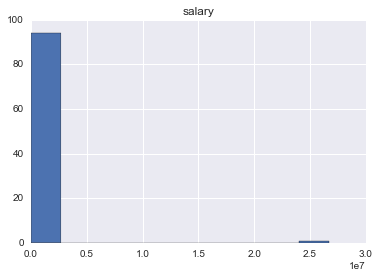

In [379]:
salary_c.hist();

In [384]:
salary_c.max()[0]

26704229.0

In [385]:
data_df[data_df['salary']==salary_c.max()[0]]['name']

104    TOTAL
Name: name, dtype: object

Remove the 'TOTAL' record from data_dict and the data frame

In [393]:
#data_dict.pop('TOTAL')
data_df = data_df[data_df['name'] != 'TOTAL']

In [435]:
data_df = data_df[data_df['name'] != 'THE TRAVEL AGENCY IN THE PARK']

In [443]:
poi = data_df['poi']
poi = poi.apply(lambda x: 1 if x else 0)

In [446]:
sum(poi)

18

In [394]:
#remove max from from salary_c and check again
salary_c = salary_c[ salary_c['salary'] != salary_c['salary'].max()]

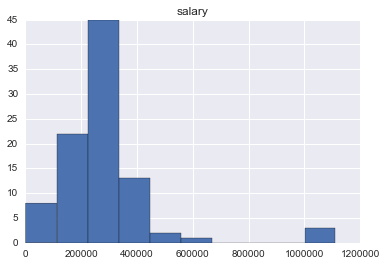

In [396]:
salary_c.hist();

In [397]:
salary_c['salary'].max()

1111258.0

In [398]:
data_df[ data_df['salary'] == salary_c['salary'].max() ]['name']

95    SKILLING JEFFREY K
Name: name, dtype: object

Since this second 'outlier' is a person, we'll keep this data.

Looking for other outliers

In [402]:
expenses = data_df['expenses']
expenses_c = expenses[expenses.apply(lambda x: not math.isnan(float(x)))]
expenses_c = pd.DataFrame(expenses_c.apply(lambda x: float(x)))

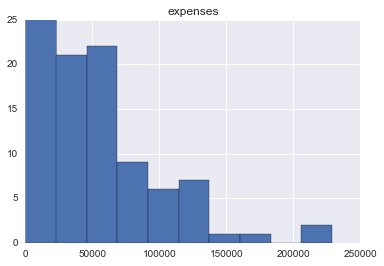

In [403]:
expenses_c.hist();

In [406]:
expenses_c.describe()

,expenses
count,94.000000
mean,54192.010638
std,46108.377454
min,148.000000
25%,22479.000000
50%,46547.500000
75%,78408.500000
max,228763.000000


In [407]:
data_df[ data_df['expenses'] == expenses_c['expenses'].max() ]['name']

71    MCCLELLAN GEORGE
Name: name, dtype: object

The max expense is from a person; we'll keep this as well.

In [409]:
nan_count = defaultdict(list)
for k, v in feature_l.iteritems():
    num_nan = sum([1 for e in v if e == 'NaN'] )
    nan_count['feature'].append(k)
    nan_count['nan_count'].append(num_nan)
    
nan_count = pd.DataFrame(nan_count)

In [410]:
nan_count.sort_values('nan_count')

,feature,nan_count
19,name,0
3,poi,0
15,total_stock_value,20
20,total_payments,21
5,email_address,35
17,restricted_stock,36
21,exercised_stock_options,44
2,expenses,51
18,salary,51
12,other,53


I prefer features that have more data as opposed to missing data.  Since I plan to use the email data, which have 60 NaNs per feature at most, I'll use that as the cut-off point.  Since 'bonus' is close to that cut-off at 64 NaNs, I'll also include 'bonus' and all features with fewer NaNs.  I'll exclude 'email address', since it is not numerical.

In [237]:
### Task 1: Select what features you'll use.
### feature_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".

#The features are either related to compensation/expenses or to emails
feature_list = ['poi',
                 'salary',
                 'total_stock_value',
                 'total_payments',
                 'restricted_stock',
                 'exercised_stock_options',
                 'other',
                 'bonus',
                 'expenses',
                 'to_messages',
                 'from_messages',
                 'from_this_person_to_poi',
                 'from_poi_to_this_person',
                 'shared_receipt_with_poi'
                ]

Two members appear not to be persons, so I'll remove these from the data

In [47]:
#Task 2 Remove outliers
data_dict.pop('THE TRAVEL AGENCY IN THE PARK')

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

In [48]:
data_dict.pop('TOTAL')

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

### Create new features

I can scale the compensation data to be between 0 and 1.  This is helpful if using SVM or K-means which calculate a distance based on more than one dimension.

For emails, I can get a ratio of poi emails received divided by all emails received, and similarly for other poi_emails.

In [81]:
def scale_feature(data_dict, feature, feature_scaled):
    feature_l = [v[feature] for v in data_dict.values() if v[feature] != 'NaN']
    scaler = MinMaxScaler()
    scaler.fit(np.array(feature_l).reshape(len(feature_l),1))
    
    for name, data in data_dict.iteritems():
        if data[feature] == 'NaN':
            data[feature_scaled] = 'NaN'
        else:
            data[feature_scaled] = scaler.transform(np.array([[data[feature]]]))[0][0]
    return data_dict

In [89]:
def compute_ratio(data_dict, numerator, denominator, ratio):
    for k, v in data_dict.iteritems():
        n = v[numerator]
        d = v[denominator]
        if n == 'NaN' or d == 'NaN' or d == 0:
            data_dict[k][ratio] = 'NaN'
        else:
            data_dict[k][ratio] = float(n) / float(d)

In [90]:
#first compute email ratios
ratios_to_compute = [('from_this_person_to_poi', 'from_messages', 'to_poi_ratio'),
                     ('from_poi_to_this_person', 'to_messages', 'from_poi_ratio'),
                     ('shared_receipt_with_poi', 'to_messages', 'shared_poi_ratio')
                    ]

for numerator, denominator, ratio in ratios_to_compute:
    compute_ratio(data_dict, numerator, denominator, ratio)

In [98]:
#then scale compensation, expense, and email ratios
feature_to_scale = ['salary',
                    'total_stock_value',
                     'total_payments',
                     'restricted_stock',
                     'exercised_stock_options',
                     'other',
                     'bonus',
                     'expenses',
                     'to_poi_ratio',
                     'from_poi_ratio',
                     'shared_poi_ratio'
                    ]
for feature in feature_to_scale:
    data_dict = scale_feature(data_dict, feature, feature + '_scaled')

In [452]:
feature_list = ['poi',
                 'salary_scaled',
                 'total_stock_value_scaled',
                 'total_payments_scaled',
                 'restricted_stock_scaled',
                 'exercised_stock_options_scaled',
                 'other_scaled',
                 'bonus_scaled',
                 'expenses_scaled',
                 'to_poi_ratio_scaled',
                 'from_poi_ratio_scaled',
                 'shared_poi_ratio_scaled'
                ]

In [101]:
### Store to my_dataset for easy export below.
my_dataset = data_dict

In [453]:
### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, feature_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

#### Rank features by importance

I'll try both Random Forest and selectkbest method to rank features

In [459]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(features, labels)
print sorted (zip (map(lambda x: round(x,2),clf.feature_importances_) , feature_list), reverse=True)

[(0.17, 'expenses_scaled'), (0.15, 'exercised_stock_options_scaled'), (0.12, 'restricted_stock_scaled'), (0.11, 'other_scaled'), (0.11, 'bonus_scaled'), (0.1, 'salary_scaled'), (0.08, 'from_poi_ratio_scaled'), (0.06, 'total_payments_scaled'), (0.04, 'total_stock_value_scaled'), (0.03, 'to_poi_ratio_scaled'), (0.02, 'poi')]


#### Rank feature using selectKBest

In [468]:
from sklearn.feature_selection import SelectKBest
clf = SelectKBest(k=11)
clf.fit(features, labels)
print sorted (zip (map(lambda x: round(x,0),clf.scores_), feature_list), reverse = True)

[(24.0, 'salary_scaled'), (24.0, 'restricted_stock_scaled'), (20.0, 'other_scaled'), (18.0, 'poi'), (16.0, 'expenses_scaled'), (11.0, 'total_payments_scaled'), (9.0, 'total_stock_value_scaled'), (9.0, 'from_poi_ratio_scaled'), (6.0, 'bonus_scaled'), (4.0, 'exercised_stock_options_scaled'), (3.0, 'to_poi_ratio_scaled')]


### Try classifiers

In [103]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

In [105]:
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

#### Naive Bayes with and without PCA

If I vary the components for each test, I find the best F1 score of 0.30151 at 9 components.  Whereas if I run grid search, it gives 4 as the best number of components; but this gives me lower precision and recall when I run it through the test.  So will try using and not using GridSearch when trying to find the best parameters.

In [265]:
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB
for n_components in [None,3,4,5,6,7,8,9,10]:
    
    if n_components == None:
        print "Naive Bayes without PCA"
        gnb = GaussianNB()
        test_classifier(clf=gnb, dataset=my_dataset, feature_list=feature_list, folds=1000)
    else:
        print "Naive Bayes with PCA using {} components".format(n_components)
        pca = PCA(n_components=n_components)
        gnb = GaussianNB()
        pipe = make_pipeline(pca, gnb)
        test_classifier(clf=pipe, dataset=my_dataset, feature_list=feature_list, folds=1000)

Using PCA with None components
GaussianNB(priors=None)
	Accuracy: 0.83867	Precision: 0.33465	Recall: 0.21250	F1: 0.25994	F2: 0.22923
	Total predictions: 15000	True positives:  425	False positives:  845	False negatives: 1575	True negatives: 12155

Using PCA with 3 components
Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('gaussiannb', GaussianNB(priors=None))])
	Accuracy: 0.84833	Precision: 0.35167	Recall: 0.16300	F1: 0.22275	F2: 0.18259
	Total predictions: 15000	True positives:  326	False positives:  601	False negatives: 1674	True negatives: 12399

Using PCA with 4 components
Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('gaussiannb', GaussianNB(priors=None))])
	Accuracy: 0.84440	Precision: 0.32384	Recall: 0.15350	F1: 0.20828	F2: 0.17155
	Total predictions: 15000	True positives:  307	False posi

I tried using GridSearch to use either no PCA or PCA with varying components, but the results have a lower precision/accuracy than when I use a loop to vary the use of PCA.  The F1 score is 0.27257

In [277]:
#Pipeline PCA and Naive Bayes and GridSearch
pca = PCA()
gnb = GaussianNB()
estimators = [('pca', pca), 
              ('gnb', gnb)]
pipe = Pipeline(estimators)
params = dict(pca = [None,
                     PCA(n_components=8),
                     PCA(n_components=9)
                    ])
clf = GridSearchCV(pipe, param_grid=params)

test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=1000)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('gnb', GaussianNB(priors=None))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'pca': [None, PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)
	Accuracy: 0.83027	Precision: 0.31800	Recall: 0.23850	F1: 0.27257	F2: 0.25105
	Total predictions: 15000	True positives:  477	False positives: 1023	False negatives: 1523	True negatives: 11977



#### Support Vector Machine with and without PCA

The best F1 score I see is .28289 for when I don't use PCA, C is 10000.0, gamma is either 0.0005 or 0.001.

In [284]:
from sklearn.svm import SVC
print "Support Vector Machines with PCA with different components"

for n_components in [None,5,7]:
    for C in [5e3, 1e4, 5e4]:
        for gamma in [0.0005, 0.001, 0.005]:

            if n_components == None:
                print "SVC without PCA, C {} gamma {}".format(C,gamma)
                clf = SVC(kernel='rbf', C=C, gamma=gamma)
                test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=100)
            else:
                print "SVC with PCA & {} components, C {}, gamma {}".format(n_components,
                                                                               C, gamma)
                pca = PCA(n_components=n_components)
                svc = SVC(kernel='rbf', C=C, gamma=gamma)
                clf = make_pipeline(pca, svc)
                test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=100)

Support Vector Machines with PCA with different components
SVC without PCA, C 5000.0 gamma 0.0005
SVC(C=5000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
	Accuracy: 0.88400	Precision: 0.86111	Recall: 0.15500	F1: 0.26271	F2: 0.18541
	Total predictions: 1500	True positives:   31	False positives:    5	False negatives:  169	True negatives: 1295

SVC without PCA, C 5000.0 gamma 0.001
SVC(C=5000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
	Accuracy: 0.88733	Precision: 0.89744	Recall: 0.17500	F1: 0.29289	F2: 0.20858
	Total predictions: 1500	True positives:   35	False positives:    4	False negatives:  165	True negatives: 1296

SVC without PCA, C 5000.0 gamma

When using GridSearch, each time I run fit, it will look for the best parameter, which may not be the same whenever the training data changes.  So when I pass the grid search to the test method, since it runs fit multiple times as it re-shuffles the data to create mutiple training sets, I'm ending up with higher precision, recall and F1 scores.  

The highest F1 score I see is 0.35951, when there are 4 PCA components.

In [285]:
print "Support Vector Machines with PCA with different components"
for n_components in [4,5,6,7,8]:
    pca = PCA(n_components=n_components)
    param_grid = {
          'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
    grid_svc = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
    clf = make_pipeline(pca,grid_svc)
    print "PCA with {} components, SVC grid search".format(n_components)
    test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=100)
    print "\n"

Support Vector Machines with PCA with different components
PCA with 4 components, SVC grid search
Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('gridsearchcv', GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=...     pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0))])
	Accuracy: 0.75533	Precision: 0.27614	Recall: 0.51500	F1: 0.35951	F2: 0.43905
	Total predictions: 1500	True positives:  103	False positives:  270	False negatives:   97	True negatives: 1030

PCA with 5 components, SVC grid search
Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('gridsearchcv', GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight

#### Decision Trees

The highest F1 I see is 0.24157 when PCA is used with 5 components and min samples to split is 20.  But F1 scores are generally low.

In [289]:
from sklearn.tree import DecisionTreeClassifier

for n_components in [None,5,7,9]:
    for min_samples_split in [20,50,70]:
        if n_components == None:
            print "Decision Tree min samples to split {} without PCA".format(min_samples_split)
            clf = DecisionTreeClassifier(min_samples_split=min_samples_split)
            test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=100)
            
        else:
            print "PCA {}, Decision Tree min_samples_split {} PCA".format(n_components,
                                                                                min_samples_split)
            pca = PCA(n_components=n_components)
            dtc = DecisionTreeClassifier(min_samples_split=min_samples_split)
            clf = make_pipeline(pca, dtc)
            test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=100)
    

Decision Tree min samples to split 20 without PCA
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.81800	Precision: 0.22137	Recall: 0.14500	F1: 0.17523	F2: 0.15575
	Total predictions: 1500	True positives:   29	False positives:  102	False negatives:  171	True negatives: 1198

Decision Tree min samples to split 50 without PCA
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.83333	Precision: 0.14286	Recall: 0.05000	F1: 0.07407	F2: 0.05747
	Total

For Decision Tree with GridSearch, accuracy was lower than when I did not use grid search.

In [290]:
for n_components in [None, 5, 7, 9]:
    if n_components == None:
        print "Decision Tree grid search, no PCA"
        dtc = DecisionTreeClassifier()
        param_grid = {'min_samples_split': [20,50,70]}
        clf = GridSearchCV(dtc, param_grid)
        test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=100)
    else:
        print "Decision Tree, PCA {} grid search".format(n_components)
        pca = PCA(n_components)
        param_grid = {'min_samples_split': [20,50,70]}
        grid_dtc = GridSearchCV(dtc, param_grid)
        clf = make_pipeline(pca, grid_dtc)
        test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=100)

Decision Tree grid search, no PCA
GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [20, 50, 70]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)
	Accuracy: 0.82867	Precision: 0.16471	Recall: 0.07000	F1: 0.09825	F2: 0.07910
	Total predictions: 1500	True positives:   14	False positives:   71	False negatives:  186	True negatives: 1229

Decision Tree, PCA 5 grid search
Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('gridsearchcv', GridSearchCV

#### Adaboost with Naive Bayes and PCA

I will try Adaboost with Naive Bayes as the base estimator, and use PCA with 9 components.  The highest F1 score I see is 0.23110, using 10 estimators

In [299]:
for n_estimators in [2,5,10]:
    n_components = 9
    pca = PCA(n_components)
    gnb = GaussianNB()
    ada = AdaBoostClassifier(base_estimator=gnb, 
                                     n_estimators=n_estimators, 
                                     algorithm = algorithm)
    clf = make_pipeline(pca,ada)
    print "Adaboost {}, Naive Bayes, PCA {}".format(n_estimators, n_components)
    test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=100)
    print "\n"

Adaboost 2, Naive Bayes, PCA 9
Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('adaboostclassifier', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=GaussianNB(priors=None), learning_rate=1.0,
          n_estimators=2, random_state=None))])
	Accuracy: 0.19400	Precision: 0.12210	Recall: 0.81500	F1: 0.21238	F2: 0.38173
	Total predictions: 1500	True positives:  163	False positives: 1172	False negatives:   37	True negatives:  128



Adaboost 5, Naive Bayes, PCA 9
Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('adaboostclassifier', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=GaussianNB(priors=None), learning_rate=1.0,
          n_estimators=5, random_state=None))])
	Accuracy: 0.68267	Precision: 0.16827	Recall: 0.35000	F1: 0.22727	F2: 0.28783
	Total predictions: 15

#### Adaboost with SVM and PCA

Given that I got better results using SVM with PCA, I will try to use this within Adaboost, and fix SVM parameters C = 5000, gamma = .005

Note that if adaboost algorithm is set to the default SAMME.R, then it requires the weak learner (base estimator) to support calculation of class probabilities (it needs the base estimator to have the attribute 'predict_proba'.  

Since SVM does not have this, I need to set algorithm to SAMME.

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

Also, I cannot use grid search as the base_estimator because it does not support sample weights.

Using AdaBoost with SVM, the highest F1 score I see is 0.34270 when there are either 5 or 10 estimators, PCA 5 components, (C is 5000, gamma is .005 were set for all iterations).

In [294]:
from sklearn.ensemble import AdaBoostClassifier

for n_estimators in [2, 5, 10]:
    for n_components in [5, 7, 9]:
        C = 5000
        gamma = .005
        algorithm = 'SAMME'
        print "estimators {} PCA {}, Adaboost using SVC C {} gamma {}".format(n_estimators,
                                                                                     n_components,
                                                                                     C,
                                                                                     gamma)
        pca = PCA(n_components=n_components)
        base_estimator = svc = SVC(kernel='rbf', class_weight='balanced', C=C, gamma=gamma)
        ada = AdaBoostClassifier(base_estimator=base_estimator, 
                                 n_estimators=n_estimators, 
                                 algorithm = algorithm)
        clf = make_pipeline(pca,ada)
        test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=100)
        print "\n"

estimators 2 PCA 5, Adaboost using SVC C 5000 gamma 0.005
Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('adaboostclassifier', AdaBoostClassifier(algorithm='SAMME',
          base_estimator=SVC(C=5000, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_funct...True,
  tol=0.001, verbose=False),
          learning_rate=1.0, n_estimators=2, random_state=None))])
	Accuracy: 0.83067	Precision: 0.34483	Recall: 0.30000	F1: 0.32086	F2: 0.30801
	Total predictions: 1500	True positives:   60	False positives:  114	False negatives:  140	True negatives: 1186

estimators 2 PCA 7, Adaboost using SVC C 5000 gamma 0.005
Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('adaboostclassifier', AdaBoostClassifier(algorithm='SAMME',
          base_estimator=SVC(C=5000, cache_size=200, class_weight='balanced'

I'll try Adaboost again with 5 estimators 5 PCA components.  I'll use loops to vary C and gamma.  
Using SVC C 10000.0 gamma 0.005, I get an F1 of .36, precision of .36, and recall of .36

In [420]:

n_estimators = 5
n_components = 5
algorithm = 'SAMME'
for C in [5e3, 1e4, 5e4]:
    for gamma in [0.0005, 0.001, 0.005]:

        print "estimators {} PCA {}, Adaboost using SVC C {} gamma {}".format(n_estimators,
                                                                                     n_components,
                                                                                     C,
                                                                                     gamma)
        pca = PCA(n_components=n_components)
        base_estimator = svc = SVC(kernel='rbf', class_weight='balanced', C=C, gamma=gamma)
        ada = AdaBoostClassifier(base_estimator=base_estimator, 
                                 n_estimators=n_estimators, 
                                 algorithm = algorithm)
        clf = make_pipeline(pca,ada)
        test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=100)
        print "\n"

estimators 5 PCA 5, Adaboost using SVC C 5000.0 gamma 0.0005
Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('adaboostclassifier', AdaBoostClassifier(algorithm='SAMME',
          base_estimator=SVC(C=5000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_fun...True,
  tol=0.001, verbose=False),
          learning_rate=1.0, n_estimators=5, random_state=None))])
	Accuracy: 0.86600	Precision: 0.49587	Recall: 0.30000	F1: 0.37383	F2: 0.32573
	Total predictions: 1500	True positives:   60	False positives:   61	False negatives:  140	True negatives: 1239



estimators 5 PCA 5, Adaboost using SVC C 5000.0 gamma 0.001
Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('adaboostclassifier', AdaBoostClassifier(algorithm='SAMME',
          base_estimator=SVC(C=5000.0, cache_size=200, class_weight='

Adaboost SVM with GridSearch doesn't appear to work, because it says that the result is worse than random, and cannot be fit.

In [470]:
n_estimators = 5
n_components = 5
algorithm = 'SAMME'
param_grid = {
         'base_estimator__C': [5e3, 1e4, 5e4, 1e5],
          'base_estimator__gamma': [0.0005, 0.001, 0.005, 0.01, 0.1],
          }
pca = PCA(n_components=n_components)
base_estimator = SVC(kernel='rbf', class_weight='balanced')
ada = AdaBoostClassifier(base_estimator=base_estimator, 
                                 n_estimators=n_estimators, 
                                 algorithm = algorithm)
grid = GridSearchCV(ada, param_grid)
clf = grid
clf = make_pipeline(pca, grid)

#this gives the error :
#ValueError: BaseClassifier in AdaBoostClassifier ensemble is worse than random, ensemble can not be fit.

#test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=100)

#### Adaboost with Decision Tree

Since the decision tree did better without PCA, I'll try Adaboost using Decision Tree as the base estimator, and using original features without PCA.

The highest F1 score I see here is 0.33429, when n_estimators for Adaboost is 5, and min samples for a split in the tree is 70.  This seems to change each time i run the test, but generally, with 10 estimators, for min sample split of 20, 50 or 70, the F1 is .30 or higher.

In [303]:
from sklearn.ensemble import AdaBoostClassifier

algorithm = 'SAMME.R' #default
for n_estimators in [5,10,20]:
    for min_samples_split in [20,50,70]:
        base_estimator = DecisionTreeClassifier(min_samples_split=min_samples_split)
        clf = AdaBoostClassifier(base_estimator=base_estimator, 
                                 n_estimators=n_estimators, 
                                 algorithm = algorithm)
        print "AdaBoost w/ Decision Tree; n_estimators {}, min_samples {}".format(n_estimators,
                                                                                 min_samples_split)
        test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=100)
        print "\n"

AdaBoost w/ Decision Tree; n_estimators 5, min_samples 20
AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=5, random_state=None)
	Accuracy: 0.84467	Precision: 0.37594	Recall: 0.25000	F1: 0.30030	F2: 0.26795
	Total predictions: 1500	True positives:   50	False positives:   83	False negatives:  150	True negatives: 1217



AdaBoost w/ Decision Tree; n_estimators 5, min_samples 50
AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1

#### Random Forest

With Random Forest, the highest F1 I see is 0.32117, with 5 estimators and 20 min sample size for a split.  This is better than using the decision tree by itself, for which the highest F1 score I found was .24

In [301]:
from sklearn.ensemble import RandomForestClassifier
for n_estimators in [5,10]:
    for min_samples_split in [20, 50, 70]:
        clf = RandomForestClassifier(n_estimators=n_estimators,
                                    min_samples_split=min_samples_split)
        print "Random Forest n_estimators {}, min_samples {}".format(n_estimators,
                                                                     min_samples_split)
        test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=100)
        print "\n"

Random Forest n_estimators 5, min_samples 20
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.86067	Precision: 0.45161	Recall: 0.21000	F1: 0.28669	F2: 0.23516
	Total predictions: 1500	True positives:   42	False positives:   51	False negatives:  158	True negatives: 1249



Random Forest n_estimators 5, min_samples 50
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state

#### Adaboost with logistic regression

This posting pointed out that the Adaboost's base estimator should support class probabilities, and gave logistic regression as an example.

#### Reference 
http://stackoverflow.com/questions/27107205/sklearn-ensemble-adaboostclassifier-cannot-accecpt-svm-as-base-estimator

In [422]:
from sklearn.linear_model import LogisticRegression
n_estimators = 5
n_components = 5
param_grid = {
    'base_estimator__C' : [1e3, 5e3, 1e4, 5e4, 1e5],
    'n_estimators' : [5, 10]
}

pca = PCA(n_components=n_components)
base_estimator = LogisticRegression()
ada = AdaBoostClassifier(base_estimator=base_estimator, 
                                 n_estimators=n_estimators, 
                                 algorithm = algorithm)
grid = GridSearchCV(ada, param_grid)
clf = make_pipeline(pca, grid)
test_classifier(clf=clf, dataset=my_dataset, feature_list=feature_list, folds=100)

Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('gridsearchcv', GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME',
          base_estimator=LogisticRegression(C=1.0, ...     pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0))])
	Accuracy: 0.89000	Precision: 0.83019	Recall: 0.22000	F1: 0.34783	F2: 0.25791
	Total predictions: 1500	True positives:   44	False positives:    9	False negatives:  156	True negatives: 1291



### Effects of created features

Compare Adaboost with SVM with the email ratio features, with just the email counts, and without the email data



#### Adaboost SVM with email ratio features

In [447]:
feature_list = ['poi',
                 'salary_scaled',
                 'total_stock_value_scaled',
                 'total_payments_scaled',
                 'restricted_stock_scaled',
                 'exercised_stock_options_scaled',
                 'other_scaled',
                 'bonus_scaled',
                 'expenses_scaled',
                 'to_poi_ratio_scaled',
                 'from_poi_ratio_scaled',
                 'shared_poi_ratio_scaled'
                ]
n_estimators = 5
n_components = 5
algorithm = 'SAMME'
C = 1e4
gamma = 0.005
pca = PCA(n_components=n_components)
base_estimator = svc = SVC(kernel='rbf',
                           class_weight='balanced',
                           C=C,
                           gamma=gamma)
ada = AdaBoostClassifier(base_estimator=base_estimator,
                         n_estimators=n_estimators,
                         algorithm = algorithm)
clf = make_pipeline(pca,ada)
test_classifier(clf=clf,
                dataset=my_dataset,
                feature_list=feature_list,
                folds=100)

Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('adaboostclassifier', AdaBoostClassifier(algorithm='SAMME',
          base_estimator=SVC(C=10000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_fu...True,
  tol=0.001, verbose=False),
          learning_rate=1.0, n_estimators=5, random_state=None))])
	Accuracy: 0.83000	Precision: 0.36181	Recall: 0.36000	F1: 0.36090	F2: 0.36036
	Total predictions: 1500	True positives:   72	False positives:  127	False negatives:  128	True negatives: 1173



#### Adaboost SVM with absolute email counts

This doesn't get a result, possibly because it gives no positive predictions.  So absolute email counts are not helpful.

In [449]:
feature_to_scale = ['salary',
                    'total_stock_value',
                     'total_payments',
                     'restricted_stock',
                     'exercised_stock_options',
                     'other',
                     'bonus',
                     'expenses',
                     'from_this_person_to_poi',
                     'from_poi_to_this_person',
                     'shared_receipt_with_poi'
                    ]

for feature in feature_to_scale:
    data_dict = scale_feature(data_dict, feature, feature + '_scaled')

feature_list = ['poi',
                 'salary_scaled',
                 'total_stock_value_scaled',
                 'total_payments_scaled',
                 'restricted_stock_scaled',
                 'exercised_stock_options_scaled',
                 'other_scaled',
                 'bonus_scaled',
                 'expenses_scaled',
                 'from_this_person_to_poi',
                 'from_poi_to_this_person',
                 'shared_receipt_with_poi'
                ]

n_estimators = 5
n_components = 5
algorithm = 'SAMME'
C = 1e4
gamma = 0.005
pca = PCA(n_components=n_components)
base_estimator = svc = SVC(kernel='rbf',
                           class_weight='balanced',
                           C=C,
                           gamma=gamma)
ada = AdaBoostClassifier(base_estimator=base_estimator,
                         n_estimators=n_estimators,
                         algorithm = algorithm)
clf = make_pipeline(pca,ada)
test_classifier(clf=clf,
                dataset=my_dataset,
                feature_list=feature_list,
                folds=100)

Got a divide by zero when trying out: Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('adaboostclassifier', AdaBoostClassifier(algorithm='SAMME',
          base_estimator=SVC(C=10000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_fu...True,
  tol=0.001, verbose=False),
          learning_rate=1.0, n_estimators=5, random_state=None))])
Precision or recall may be undefined due to a lack of true positive predicitons.


#### Adaboost SVM with without email data

With only compensation data, the precision is higher, at .45, but recall is lower at .275.  This makes sense, in that with only compensation features, we cast a narrower net, and predict fewer false positives (and probably fewer true positives as well).  Moreover, without the email features, we miss more cases and have a lower recall.  The F1 score was 0.34.

In [450]:
feature_list = ['poi',
                 'salary_scaled',
                 'total_stock_value_scaled',
                 'total_payments_scaled',
                 'restricted_stock_scaled',
                 'exercised_stock_options_scaled',
                 'other_scaled',
                 'bonus_scaled',
                 'expenses_scaled'
                ]

n_estimators = 5
n_components = 5
algorithm = 'SAMME'
C = 1e4
gamma = 0.005
pca = PCA(n_components=n_components)
base_estimator = svc = SVC(kernel='rbf',
                           class_weight='balanced',
                           C=C,
                           gamma=gamma)
ada = AdaBoostClassifier(base_estimator=base_estimator,
                         n_estimators=n_estimators,
                         algorithm = algorithm)
clf = make_pipeline(pca,ada)
test_classifier(clf=clf,
                dataset=my_dataset,
                feature_list=feature_list,
                folds=100)

Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('adaboostclassifier', AdaBoostClassifier(algorithm='SAMME',
          base_estimator=SVC(C=10000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_fu...True,
  tol=0.001, verbose=False),
          learning_rate=1.0, n_estimators=5, random_state=None))])
	Accuracy: 0.85933	Precision: 0.45455	Recall: 0.27500	F1: 0.34268	F2: 0.29859
	Total predictions: 1500	True positives:   55	False positives:   66	False negatives:  145	True negatives: 1234

